In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import statsmodels.api as sm
import scipy.cluster.hierarchy as sch
from statsmodels.graphics.mosaicplot import mosaic

In [5]:
df = pd.read_csv("C:\\Users\\utkar\\Downloads\\mcdonalds.csv")

In [6]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
df.shape

(1453, 15)

In [8]:
MD = df.iloc[:, 0:11].values
MD = (MD == "Yes").astype(int)
column_means = np.round(np.mean(MD, axis=0), 2)
column_means

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [16]:
pca = PCA()
MD_pca = pca.fit(MD)

# Print a summary of the PCA results
print("Explained Variance Ratio:")
print(MD_pca.explained_variance_ratio_)
print("\nSummary of PCA:")
print(pd.DataFrame({'Standard deviation': MD_pca.explained_variance_ ** 0.5,
                    'Proportion of Variance': MD_pca.explained_variance_ratio_,
                    'Cumulative Proportion': MD_pca.explained_variance_ratio_.cumsum()}))

Explained Variance Ratio:
[0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]

Summary of PCA:
    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.000000


In [17]:
pca = PCA()
MD_pca = pca.fit_transform(MD)
explained_variance_ratio = pca.explained_variance_ratio_
summary = {
    "Standard Deviation": np.sqrt(pca.explained_variance_),
    "Proportion of Variance": explained_variance_ratio,
    "Cumulative Proportion": np.cumsum(explained_variance_ratio)
}
summary

{'Standard Deviation': array([0.8, 0.6, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2]),
 'Proportion of Variance': array([0.3, 0.2, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ]),
 'Cumulative Proportion': array([0.3, 0.5, 0.6, 0.7, 0.8, 0.8, 0.9, 0.9, 0.9, 1. , 1. ])}

In [18]:
np.set_printoptions(precision=1, suppress=True)
MD_pca

array([[ 0.4, -0.2,  0.7, ...,  0.2,  0.5, -0.6],
       [-0.2,  0.4, -0.7, ...,  0.1,  0.5, -0.5],
       [ 0.4,  0.7, -0.1, ..., -0.3,  0.1,  0.2],
       ...,
       [-0.2,  1.1,  0.2, ...,  0. ,  0.1, -0. ],
       [-1.2, -0. ,  0.6, ...,  0. , -0. , -0.1],
       [ 1.6,  0.3, -0. , ..., -0.1, -0.4, -0.5]])

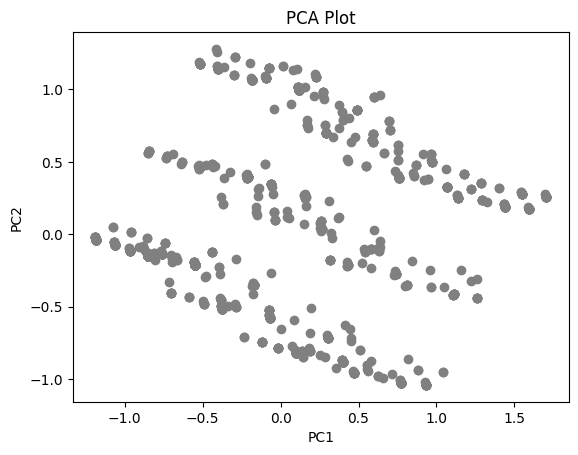

In [20]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c="grey")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Plot")
plt.show()
projected_data = np.dot(MD - np.mean(MD, axis=0), pca.components_[:2, :].T)

In [22]:
best_model = None
best_bic = float("inf")

for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD)
    bic = kmeans.inertia_ + n_clusters * np.log(len(MD))
    if bic < best_bic:
        best_bic = bic
        best_model = kmeans

cluster_labels = best_model.labels_

unique_labels = np.unique(cluster_labels)
new_labels = list(range(len(unique_labels)))
cluster_mapping = dict(zip(unique_labels, new_labels))

cluster_labels_relabel = [cluster_mapping[label] for label in cluster_labels]

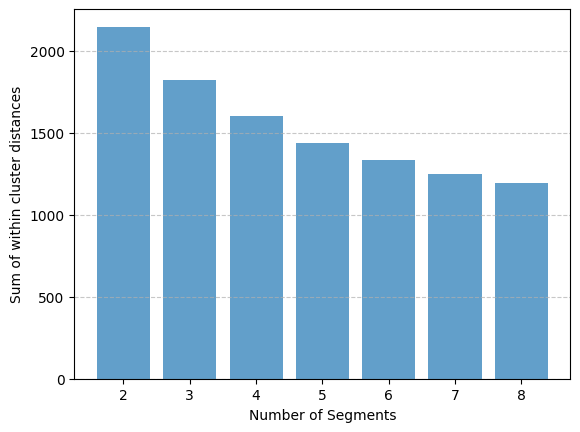

In [23]:
k_values = range(2, 9)
inertias = []

for n_clusters in k_values:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD)
    inertias.append(kmeans.inertia_)

plt.bar(k_values, inertias, align='center', alpha=0.7)
plt.xlabel("Number of Segments")
plt.ylabel("Sum of within cluster distances")
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

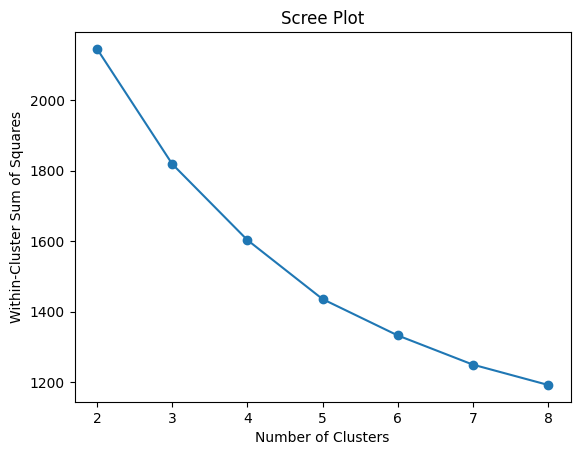

In [24]:
n_clusters_range = range(2, 9)

# Create an empty list to store within-cluster sum of squares for each solution
inertia_values = []

# Loop through different numbers of clusters
for n_clusters in n_clusters_range:
    # Create a KMeans model with 10 random restarts and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD)
    
    # Append the inertia (within-cluster sum of squares) to the list
    inertia_values.append(kmeans.inertia_)

# Create a scree plot to visualize the within-cluster sum of squares
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Scree Plot')
plt.show()

C:\Users\utkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\utkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

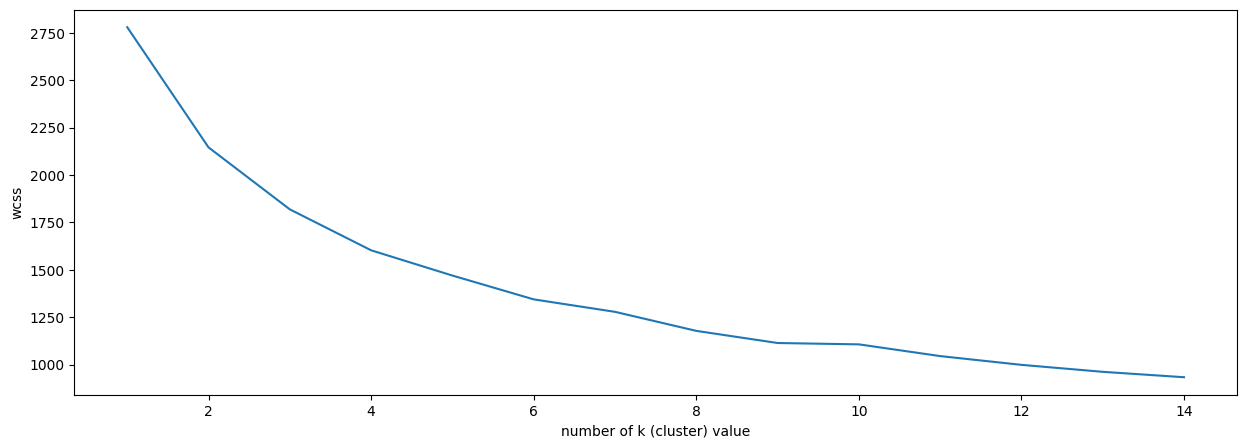

In [26]:
wcss = []
data_model = MD
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 5.
plt.figure(figsize=(15,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

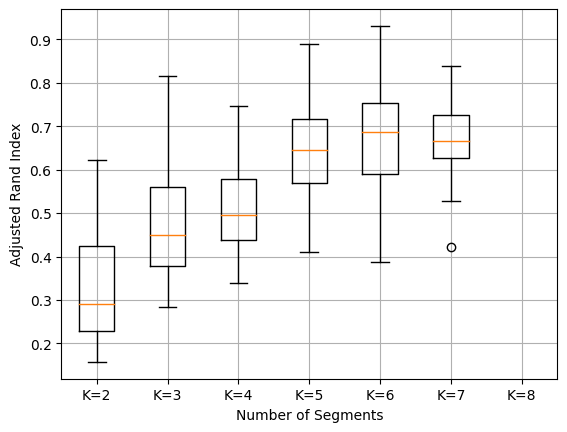

In [27]:
n_bootstraps = 100
adjusted_rand_indices = []

# Perform bootstrapping for k-means clustering and calculate adjusted Rand index
for _ in range(n_bootstraps):
    sample_indices = np.random.choice(len(MD), size=len(MD), replace=True)
    bootstrapped_data = MD[sample_indices]
    
    cluster_labels = []
    
    for n_clusters in k_values:
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        kmeans.fit(bootstrapped_data)
        cluster_labels.append(kmeans.labels_)
  
    for i in range(len(k_values)):
        for j in range(i + 1, len(k_values)):
            adjusted_rand_index = adjusted_rand_score(cluster_labels[i], cluster_labels[j])
            adjusted_rand_indices.append((k_values[i], k_values[j], adjusted_rand_index))

# Separate the data for plotting
k_value_pairs = [(pair[0], pair[1]) for pair in adjusted_rand_indices]
adjusted_rand_scores = [pair[2] for pair in adjusted_rand_indices]

adjusted_rand_values = [[] for _ in range(len(k_values))]
for i, k_pair in enumerate(k_value_pairs):
    idx = k_values.index(k_pair[0])
    adjusted_rand_values[idx].append(adjusted_rand_scores[i])
    
plt.boxplot(adjusted_rand_values, labels=[f"K={k}" for k in k_values])
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.grid(True)
plt.show()

In [28]:
df["Like"] = pd.to_numeric(df["Like"], errors="coerce")

df["Like.n"] = 6 - df["Like"]

frequency_table = df["Like.n"].value_counts()

print(frequency_table)

Like.n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64


In [29]:
column_names = df.columns[0:11]

formula_str = "Like.n ~ " + " + ".join(column_names)
print(formula_str)

Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


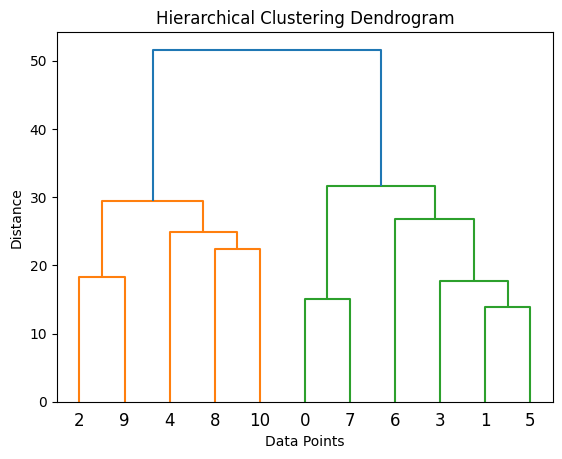

In [30]:
distance_matrix = sch.distance.pdist(MD.T)  # Transpose data for column-wise distance

# Perform hierarchical clustering
linkage_matrix = sch.linkage(distance_matrix, method='ward')  # You can change the linkage method if needed

# Create a dendrogram
dendrogram = sch.dendrogram(linkage_matrix)

# Display the dendrogram
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

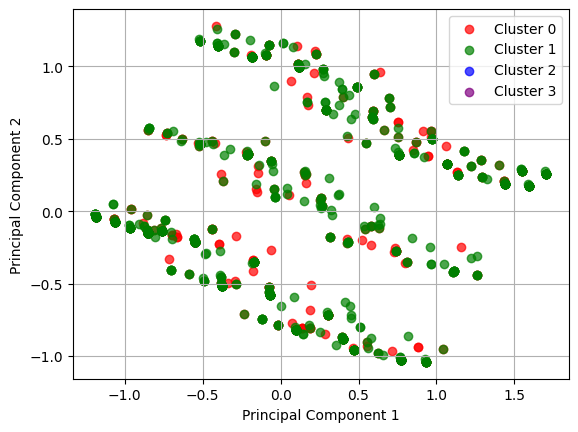

In [31]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(MD)


MD_k4 = cluster_labels[0]

colors = ['red', 'green', 'blue', 'purple']

for cluster_id in range(4):
    cluster_data = pca_result[MD_k4 == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', c=colors[cluster_id], alpha=0.7)


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()
plt.grid(True)

plt.show()